# Analyze mazes

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

import networkx as nx
from networkx import grid_graph

import pandas as pd

In [2]:
def compute_metrics(maze):
    
    agent_start_pos = np.where(maze == 2)
    agent_start_pos = [agent_start_pos[0].item(), agent_start_pos[1].item()]
    goal_pos = np.where(maze == 3)
    goal_pos = [goal_pos[0].item(), goal_pos[1].item()]
    walls_start_pos = np.where(maze == 1)
    
    distance_to_goal = abs(goal_pos[0] - agent_start_pos[0]) + abs(goal_pos[1] - agent_start_pos[1])
    
    graph = grid_graph(dim=maze.shape)
    for i in range(len(walls_start_pos[0])):
        graph.remove_node((walls_start_pos[0][i], walls_start_pos[1][i]))
        
    passable = nx.has_path(
            graph,
            source=(agent_start_pos[0], agent_start_pos[1]),
            target=(goal_pos[0], goal_pos[1]))
    if passable:
      # Compute shortest path
        shortest_path_length = nx.shortest_path_length(
        graph,
        source=(agent_start_pos[0], agent_start_pos[1]),
        target=(goal_pos[0], goal_pos[1]))
    else:
      # Impassable environment
        shortest_path_length = -1
        
    return distance_to_goal, passable, shortest_path_length

## 1. PAIRED w some of rewards using mazes with 10 walls and size 6

In [3]:
df = pd.DataFrame(columns = ['num','passable','distance_to_goal','shortest_path_length', 'rew_pro', 'rew_ant', 'tot_rew'], dtype=float)

folder_name = 'results/pos_10_6'
mazes_pics = os.listdir(folder_name)
mazes = []
for file in range(1, len(mazes_pics)):
    with open(os.path.join(folder_name, str(file)+'.pkl'), "rb") as f:
        maze_info = pickle.load(f)
        mazes.append(maze_info[0])
        distance_to_goal, passable, shortest_path_length = compute_metrics(maze_info[0])
        df = df.append({'num': file, 'passable': passable,'distance_to_goal': distance_to_goal,\
                'shortest_path_length': shortest_path_length, \
                       'rew_pro': maze_info[1], 'rew_ant': maze_info[2], 'tot_rew': maze_info[3]}, ignore_index=True)

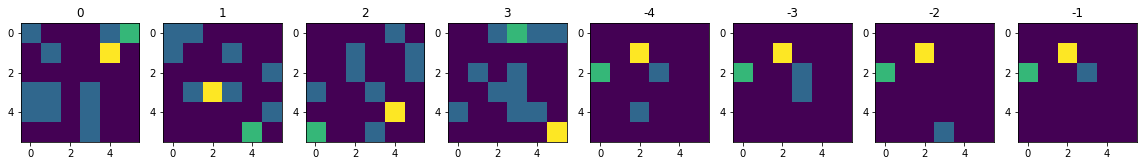

In [4]:
fig, axs = plt.subplots(1, 8, figsize=(20, 40))

ind_ = [0, 1, 2, 3, -4, -3, -2, -1]

for (ax, i) in zip(axs, ind_):
    ax.imshow(mazes[i])
    ax.set_title(str(i))

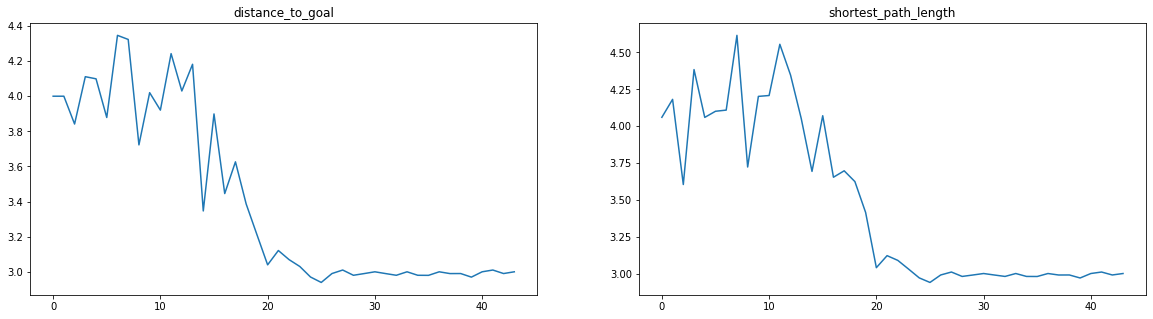

In [6]:
df['num_2'] = df['num'].apply(lambda x: round(x/100))
df2 = df.groupby(df['num_2']).mean()

fig, axs = plt.subplots(1, 2, figsize=(20,5))
axs[0].plot(df2['distance_to_goal'])
axs[0].set_title('distance_to_goal')
axs[1].plot(df2['shortest_path_length'])
_ = axs[1].set_title('shortest_path_length')

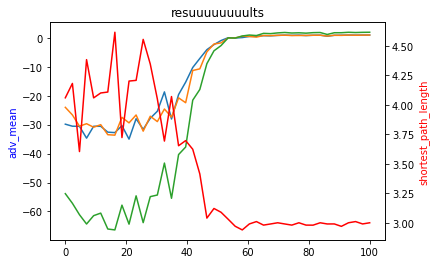

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(np.linspace(0, 100, len(df2['shortest_path_length'])), df2['shortest_path_length'], 'r-')
ax1.plot(np.linspace(0, 100, len(df2['rew_pro'])), df2['rew_pro'], '-')
ax1.plot(np.linspace(0, 100, len(df2['rew_ant'])), df2['rew_ant'], '-')
ax1.plot(np.linspace(0, 100, len(df2['tot_rew'])), df2['tot_rew'], '-')

ax2.set_xlabel('train')
ax2.set_ylabel('shortest_path_length', color='r')
ax1.set_ylabel('adv_mean', color='b')
ax2.set_title('resuuuuuuuults')

#bottom, top = ax1.get_ylim() 
#ax2.set_ylim([-0.1, 20])
#ax1.set_ylim([-20, 125])

_ = plt.figure()

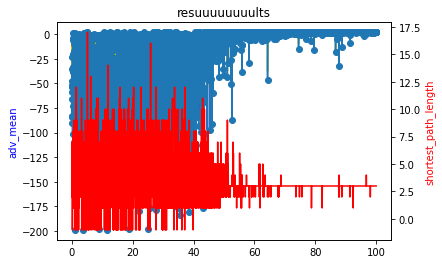

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(np.linspace(0, 100, len(df['shortest_path_length'])), df['shortest_path_length'], 'r-')
ax1.plot(np.linspace(0, 100, len(df['rew_pro'])), df['rew_pro'], 'b-')
ax1.plot(np.linspace(0, 100, len(df['rew_ant'])), df['rew_ant'], 'y-')
ax1.plot(np.linspace(0, 100, len(df['tot_rew'])), df['tot_rew'], 'o-')

ax2.set_xlabel('train')
ax2.set_ylabel('shortest_path_length', color='r')
ax1.set_ylabel('adv_mean', color='b')
ax2.set_title('resuuuuuuuults')

#bottom, top = ax1.get_ylim() 
#ax2.set_ylim([-0.1, 20])
#ax1.set_ylim([-20, 125])

_ = plt.figure()

In [9]:
np.polyfit(df['num'], df['shortest_path_length'], 1)

array([-3.82785058e-04,  4.28118087e+00])

## 2. Real PAIRED

In [38]:
df = pd.DataFrame(columns = ['num','passable','distance_to_goal','shortest_path_length', 'rew_pro', 'rew_ant', 'tot_rew'], dtype=float)

folder_name = 'results/true_10_6'
mazes_pics = os.listdir(folder_name)
mazes = []
for file in range(1, len(mazes_pics)):
    with open(os.path.join(folder_name, str(file)+'.pkl'), "rb") as f:
        maze_info = pickle.load(f)
        mazes.append(maze_info[0])
        distance_to_goal, passable, shortest_path_length = compute_metrics(maze_info[0])
        df = df.append({'num': file, 'passable': passable,'distance_to_goal': distance_to_goal,\
                'shortest_path_length': shortest_path_length, \
                       'rew_ant': maze_info[1], 'rew_pro': maze_info[2], 'tot_rew': maze_info[3]}, ignore_index=True)

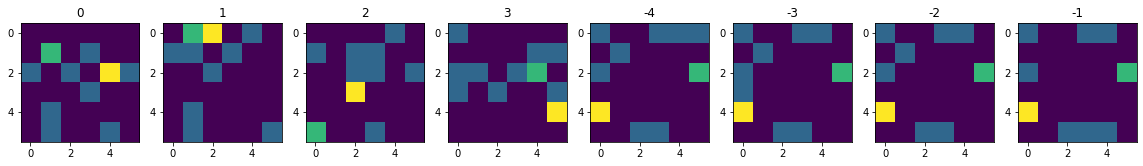

In [39]:
fig, axs = plt.subplots(1, 8, figsize=(20, 40))

ind_ = [0, 1, 2, 3, -4, -3, -2, -1]

for (ax, i) in zip(axs, ind_):
    ax.imshow(mazes[i])
    ax.set_title(str(i))

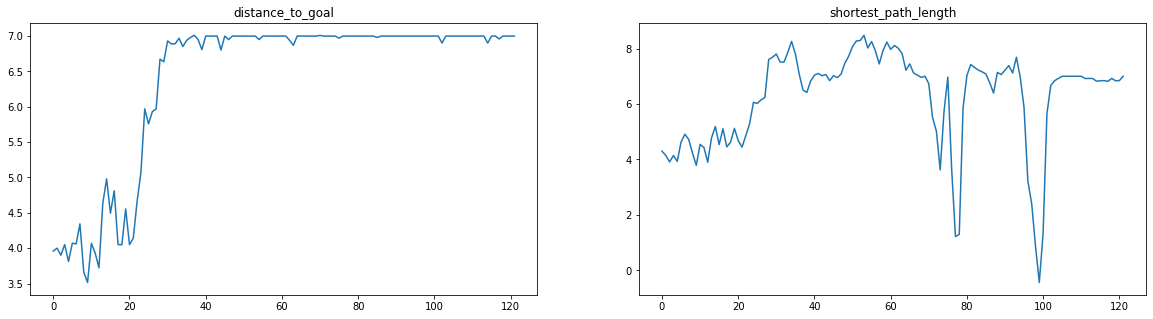

In [40]:
df['num_2'] = df['num'].apply(lambda x: round(x/100))
df2 = df.groupby(df['num_2']).mean()

fig, axs = plt.subplots(1, 2, figsize=(20,5))
axs[0].plot(df2['distance_to_goal'])
axs[0].set_title('distance_to_goal')
axs[1].plot(df2['shortest_path_length'])
_ = axs[1].set_title('shortest_path_length')

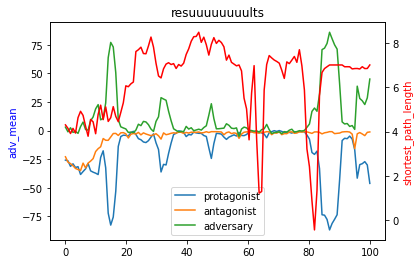

<Figure size 432x288 with 0 Axes>

In [41]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(np.linspace(0, 100, len(df2['shortest_path_length'])), df2['shortest_path_length'], 'r-')

ax1.plot(np.linspace(0, 100, len(df2['rew_pro'])), df2['rew_pro'], '-', label = 'protagonist')
ax1.plot(np.linspace(0, 100, len(df2['rew_ant'])), df2['rew_ant'], '-', label = 'antagonist')
ax1.plot(np.linspace(0, 100, len(df2['tot_rew'])), df2['tot_rew'], '-', label = 'adversary')
ax1.legend()

ax2.set_xlabel('train')
ax2.set_ylabel('shortest_path_length', color='r')
ax1.set_ylabel('adv_mean', color='b')
ax2.set_title('resuuuuuuuults')

#bottom, top = ax1.get_ylim() 
#ax2.set_ylim([-0.1, 20])
#ax1.set_ylim([-20, 125])

_ = plt.figure()

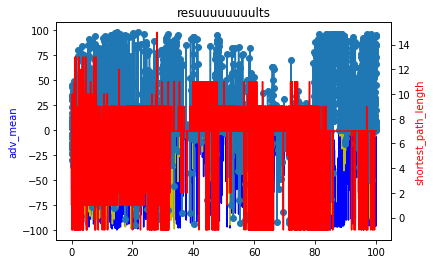

<Figure size 432x288 with 0 Axes>

In [42]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(np.linspace(0, 100, len(df['shortest_path_length'])), df['shortest_path_length'], 'r-')
ax1.plot(np.linspace(0, 100, len(df['rew_pro'])), df['rew_pro'], 'b-')
ax1.plot(np.linspace(0, 100, len(df['rew_ant'])), df['rew_ant'], 'y-')
ax1.plot(np.linspace(0, 100, len(df['tot_rew'])), df['tot_rew'], 'o-')

ax2.set_xlabel('train')
ax2.set_ylabel('shortest_path_length', color='r')
ax1.set_ylabel('adv_mean', color='b')
ax2.set_title('resuuuuuuuults')

#bottom, top = ax1.get_ylim() 
#ax2.set_ylim([-0.1, 20])
#ax1.set_ylim([-20, 125])

_ = plt.figure()